Low-Pass Filtering

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


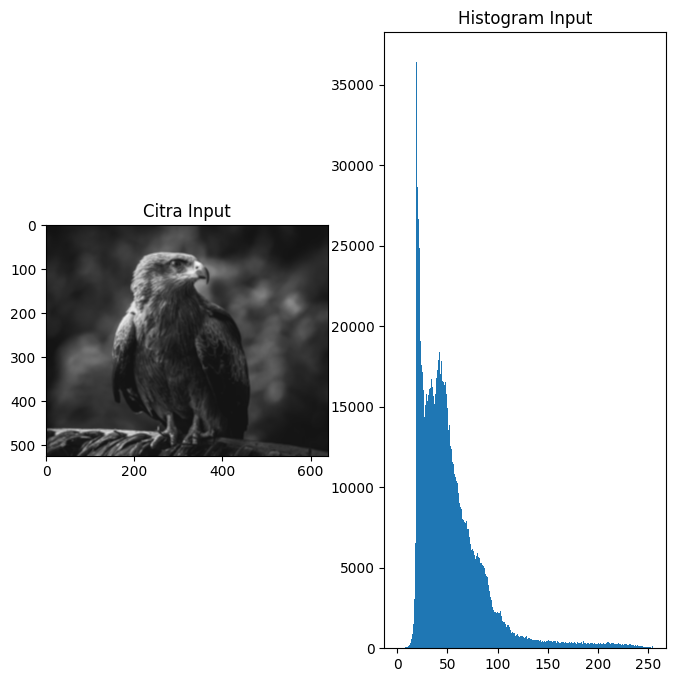

In [81]:
import cv2 #mengimport modul cv2
import numpy as np #mengimport modul numpy
from matplotlib import pyplot as plt #mengimport modul matplotlib

image = cv2.imread('foto/elang.jpg') #membaca gambar 'cat.png'ndan menyimpannya dalam variabel img
elang = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #mengonversi gambar dari mode warna BGR ke mode warna RGB dan menyimpannya dalam variabel cat
cv2.imshow('foto/elang.jpg',image) #menampilkan gambar asli 

kernel = np.ones((5, 5), np.float32) / 25 #membuat kernel 5x5 dengan nilai 1/25 untuk digunakan dalam proses filter
print(kernel) #mencetak kernel yang sudah dibuat
elang_filter = cv2.filter2D(image,-1,kernel) #menerapkan filter 2D pada gambar img menggunakan kernel yang telah dibuat

fig, axes = plt.subplots(1, 2, figsize=(8, 8)) #membuat objek gambar dengan ukuran 5x2 dan Ukuran total gambar akan memiliki lebar 20 dan tinggi 20
ax = axes.ravel() #melakukan perataan (flattening) pada array axes untuk menghasilkan array satu dimensi ax

ax[0].imshow(elang_filter, cmap=plt.cm.gray) #menampilkan citra image
ax[0].set_title("Citra Input") #memberi judul gambar 
ax[1].hist(image.ravel(), bins=256) #menampilkan histogram dari citra image
ax[1].set_title('Histogram Input') #memberi judul gambar 

cv2.waitKey(0) #menunggu pengguna menekan tombol apa pun
cv2.destroyAllWindows() #menghapus semua jendela yang ditampilkan

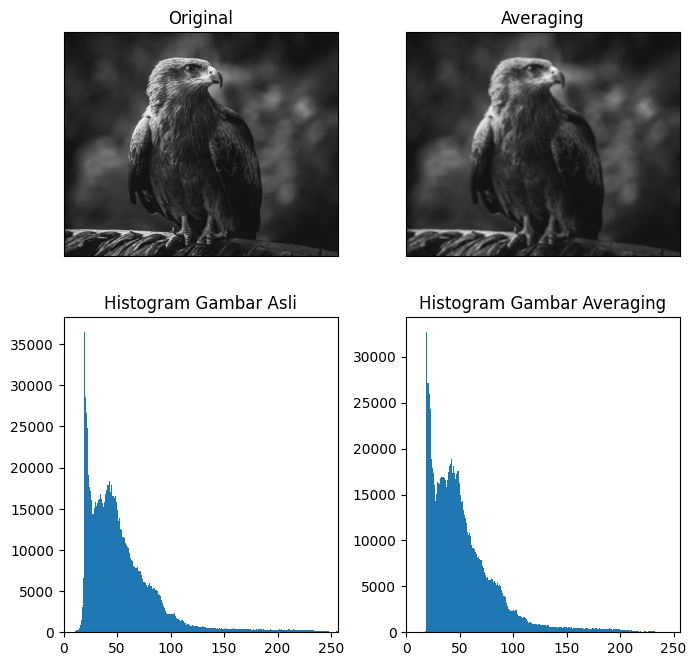

In [82]:
plt.rcParams["figure.figsize"] = (7,7) #mengatur ukuran gambar plot menjadi 8x8

plt.subplot(2, 2, 1) #membuat subplot pertama dengan indeks 2, ,2, 1
plt.imshow(elang) #menampilkan gambar asli
plt.title('Original') #memberi judul
plt.xticks([]) #menghilangkan sumbu x
plt.yticks([]) #menghilangkan sumbu y

plt.subplot(2, 2, 2) #membuat subplot kedua dengan indeks 2, 2, 2
plt.imshow(elang_filter) #menampilkan hasil filter
plt.title('Averaging') #memberi judul
plt.xticks([]) #menghilangkan sumbu x
plt.yticks([]) #menghilangkan sumbu y

plt.subplot(2, 2, 3) #membuat subplot kedua dengan indeks 2, 2, 3
plt.hist(elang.flatten(), 256, [0, 256]) #menampilkan gambar histogram dari gambar asli
plt.xlim([0, 256]) #untuk mengatur rentang sumbu x (nilai intensitas) dalam histogram
plt.title('Histogram Gambar Asli') #memberi judul

plt.subplot(2, 2, 4) #membuat subplot kedua dengan indeks 2, 2, 4
plt.hist(elang_filter.flatten(), 256, [0, 256])
plt.xlim([0, 256]) #untuk mengatur rentang sumbu x (nilai intensitas) dalam histogram
plt.title('Histogram Gambar Averaging') #memberi judul

plt.tight_layout() #mengoptimalkan tata letak (layout) dari gambar-gambar yang ditampilkan dalam satu figure secara otomatis
plt.show() #menampilkan gambar

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


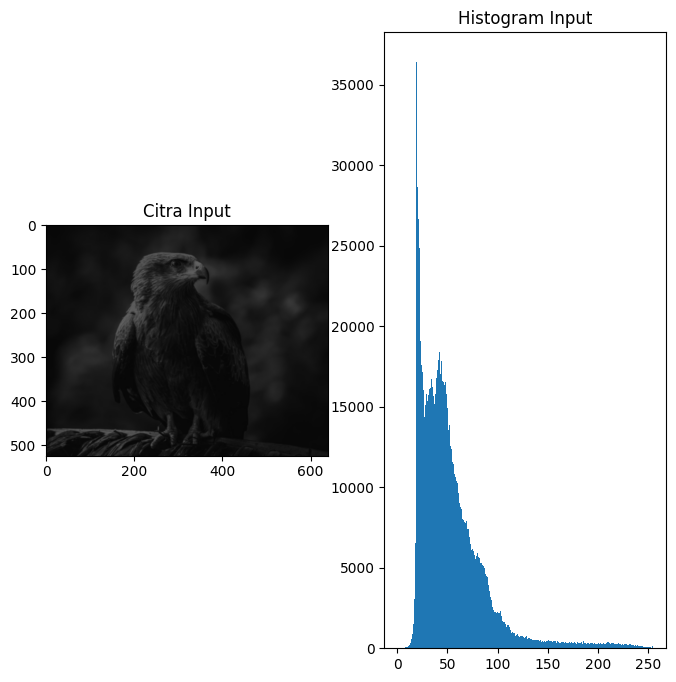

In [83]:
kernel = np.matrix([ #membuat sebuah kernel dengan ukuran 3x3 yang disimpan dalam variabel kernel
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25 
print(kernel)

elang_filter = cv2.filter2D(image,-1,kernel) #membuat filter

fig, axes = plt.subplots(1, 2, figsize=(8, 8)) #membuat objek gambar dengan ukuran 5x2 dan Ukuran total gambar akan memiliki lebar 20 dan tinggi 20
ax = axes.ravel() #melakukan perataan (flattening) pada array axes untuk menghasilkan array satu dimensi ax

ax[0].imshow(elang_filter, cmap=plt.cm.gray) #menampilkan citra image
ax[0].set_title("Citra Input") #memberi judul gambar 
ax[1].hist(image.ravel(), bins=256) #menampilkan histogram dari citra image
ax[1].set_title('Histogram Input') #memberi judul gambar 
cv2.waitKey(0) #menunggu pengguna menekan tombol apa pun
cv2.destroyAllWindows() #menghapus semua jendela yang ditampilkan

High-Pass Filtering

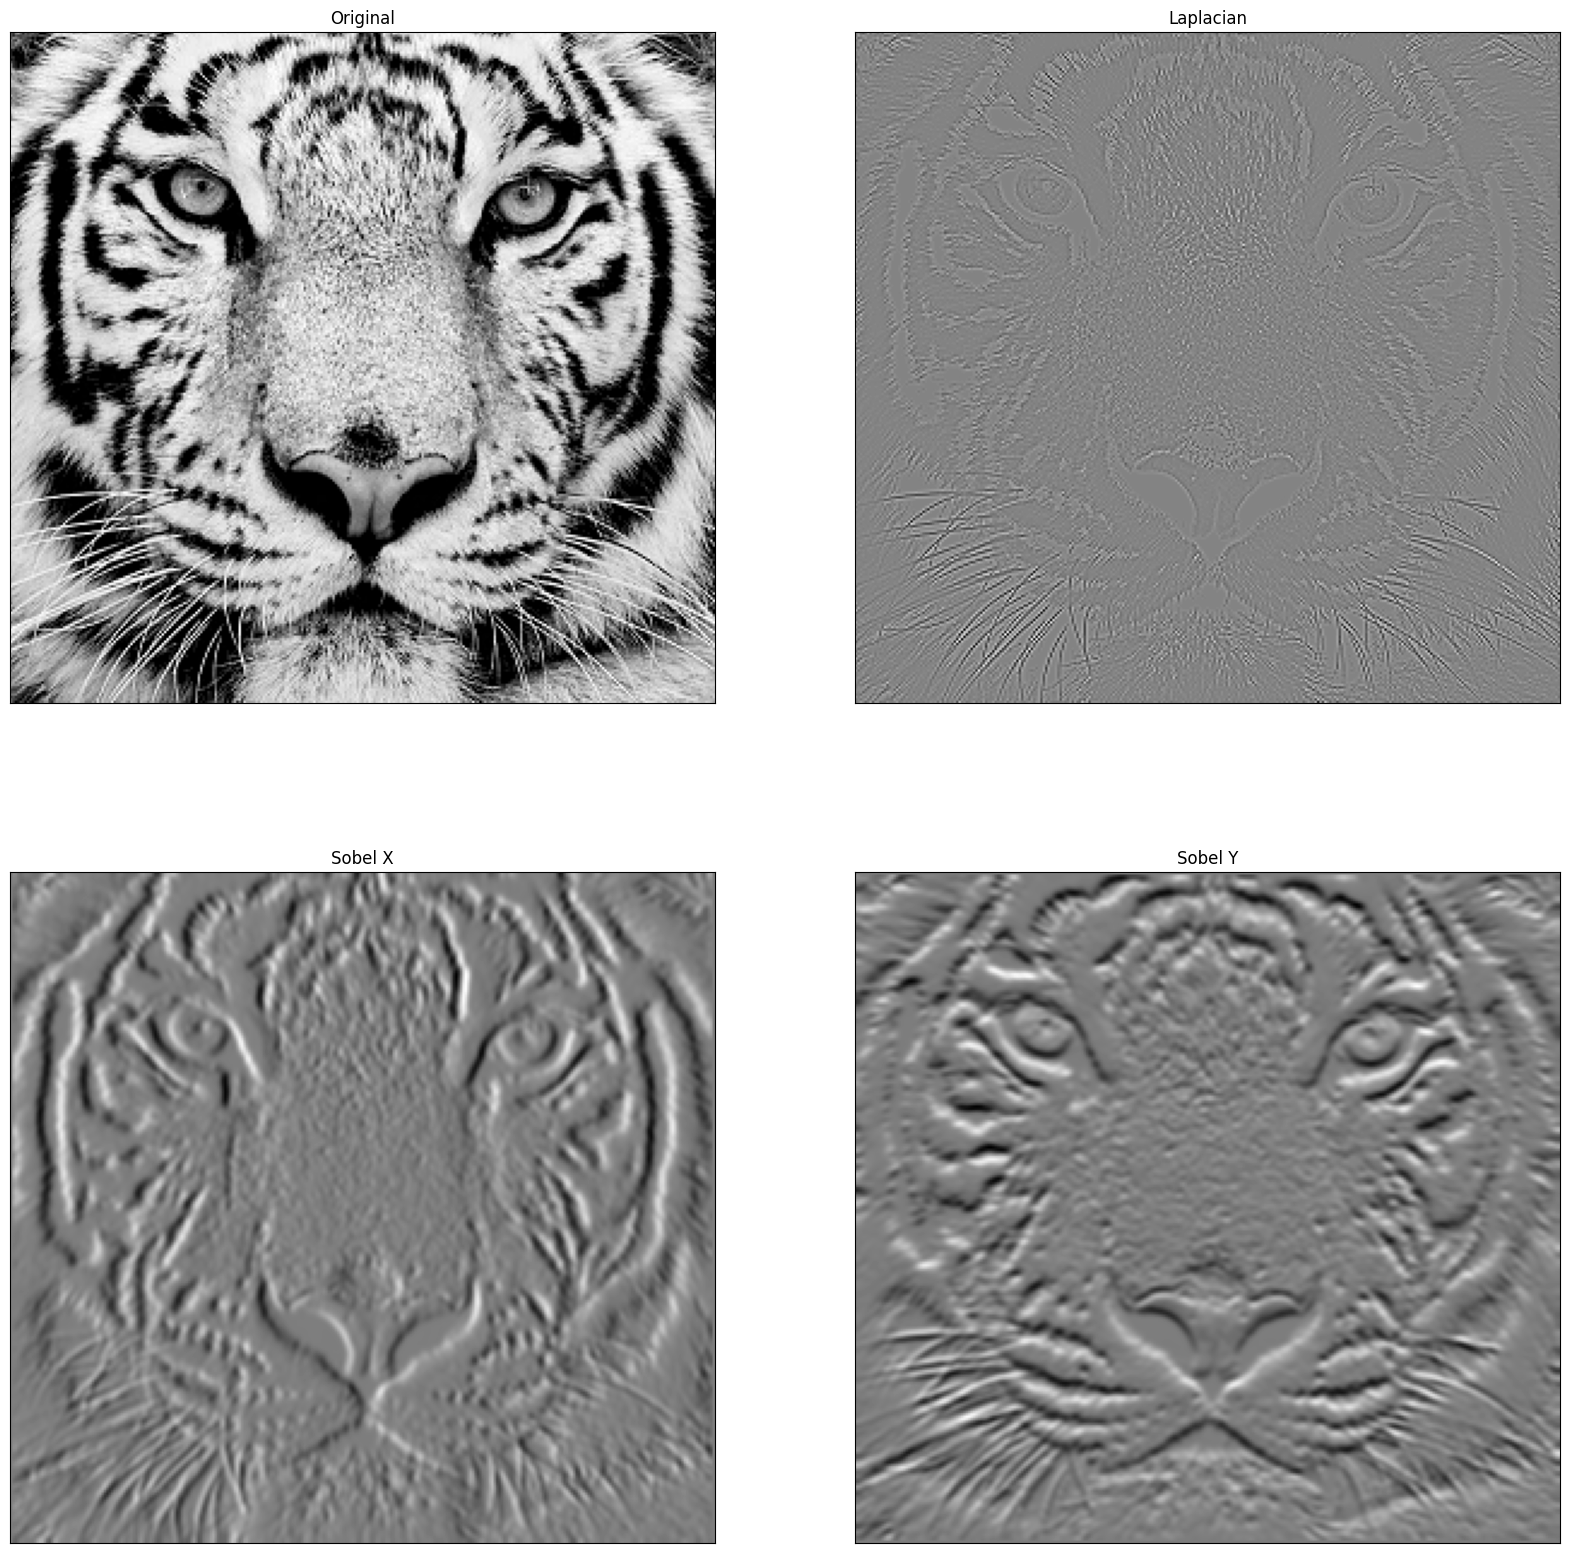

In [84]:
import cv2 #mengimport modul cv2
import numpy as np #mengimport modul numpy
from matplotlib import pyplot as plt #mengimport modul matplotlib

img = cv2.imread('foto/harimau.png',0) #membaca gambar dalam mode grayscale dan menyimpan ke variabel img
laplacian = cv2.Laplacian(img,cv2.CV_64F) #menerapkan operator Laplacian dan menyimpan hasilnya dalam variabel laplacian

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=7) #menerapkan filter Sobel ke arah sumbu x dan ukuran kernel 5x5.
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=7) #menerapkan filter Sobel ke arah sumbu y dan ukuran kernel 5x5.

plt.rcParams["figure.figsize"] = (20,20) #mengatur ukuran gambar yang akan ditampilkan
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray') #membuat subplot dengan ukuran 2x2 dan menampilkan gambar asli pada subplot 1
plt.title('Original'), plt.xticks([]), plt.yticks([]) #memberikan judul dan menghilangkan sumbu x dan y
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray') #membuat subplot pada indeks 2 dan menampilkan gambar hasil operator Laplacian
plt.title('Laplacian'), plt.xticks([]), plt.yticks([]) #memberikan judul dan menghilangkan sumbu x dan y
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray') #membuat subplot pada indeks 3 dan menampilkan gambar hasil operator Sobel pada sumbu x
plt.title('Sobel X'), plt.xticks([]), plt.yticks([]) #memberikan judul dan menghilangkan sumbu x dan y
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray') #membuat subplot pada indeks 4 dan menampilkan gambar hasil operator Sobel pada sumbu y 
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([]) #memberikan judul dan menghilangkan sumbu x dan y
plt.show()

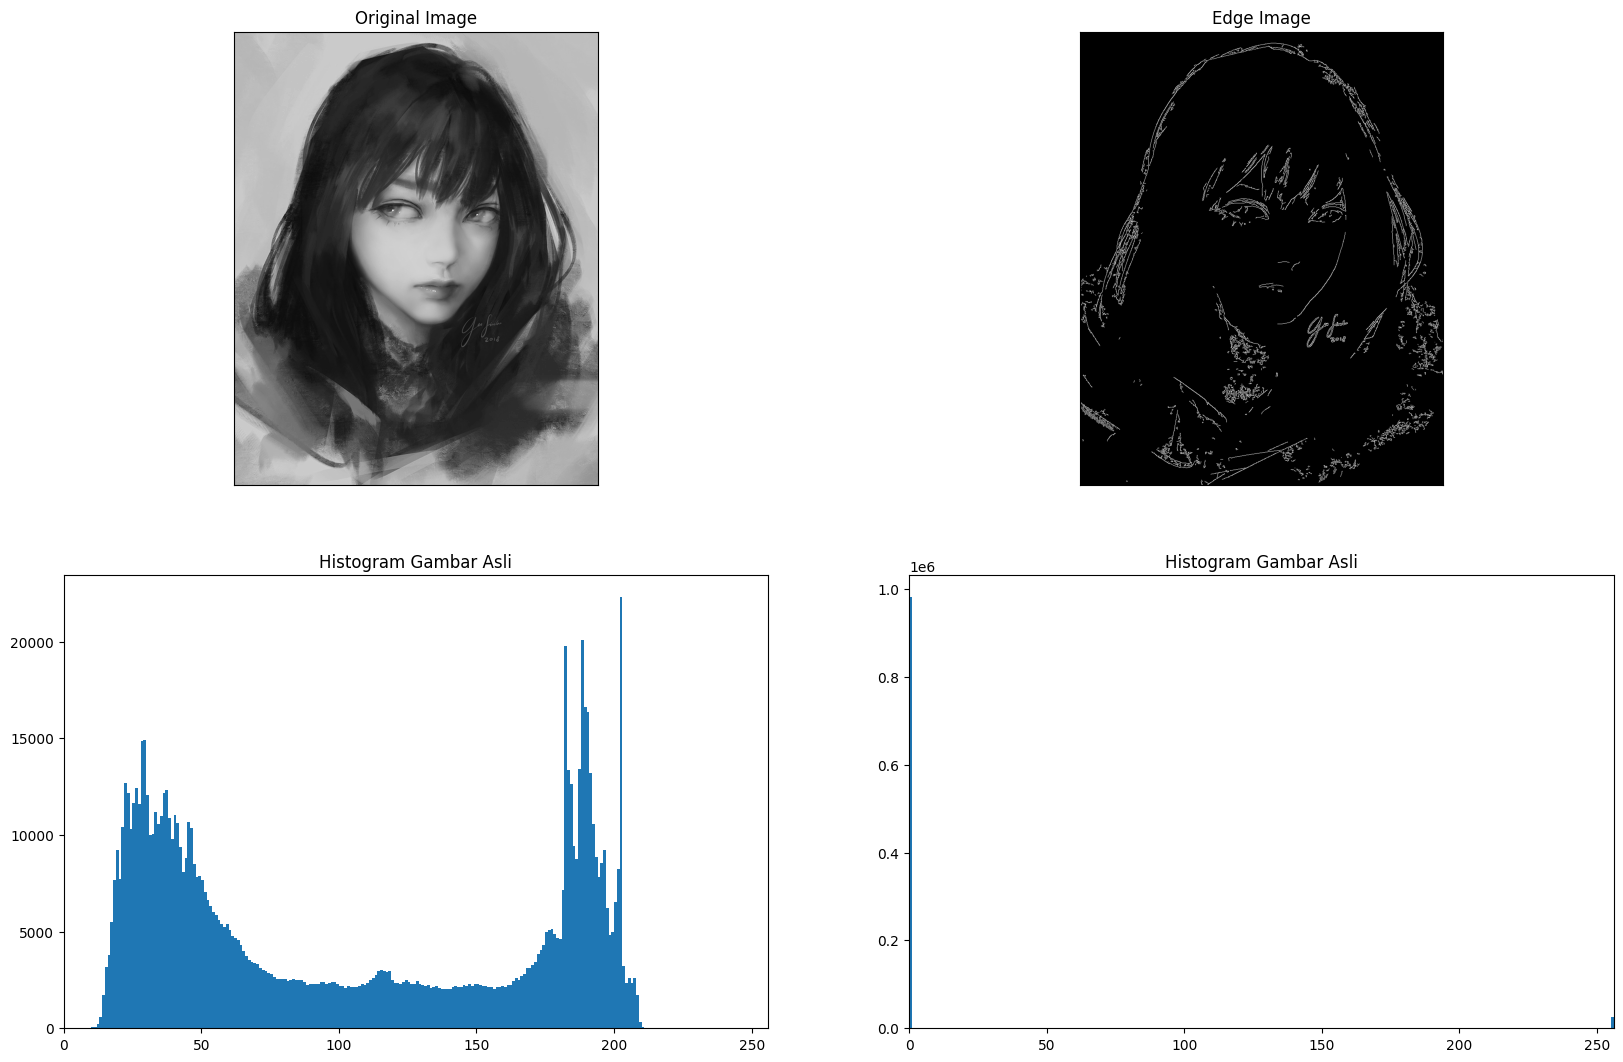

In [85]:
img = cv2.imread('foto/anime.jpg',0) #membaca gambar dalam mode grayscale dan menyimpan ke variabel img
edges = cv2.Canny(img,100,200) #menerapkan operator Canny pada gambar img, angka 100 dan 200 adalah nilai ambang bawah dan ambang atas untuk deteksi tepi

plt.subplot(3, 2, 1) #membuat subplot dengan 1 baris dan 2 kolom
plt.imshow(img,cmap = 'gray') #menampilkan gambar
plt.title('Original Image') #memberikan judul 
plt.xticks([]) #menghilangkan tanda sumbu pada subplot
plt.yticks([]) #menghilangkan tanda sumbu pada subplot
plt.subplot(3, 2, 2) #memilih subplot kedua sebagai area tampilan
plt.imshow(edges,cmap = 'gray') #menampilkan gambar hasil deteksi tepi 
plt.title('Edge Image') #memberikan judul
plt.xticks([]), plt.yticks([]) #menghilangkan tanda sumbu pada subplot

plt.subplot(3, 2, 3) #membuat subplot kedua dengan indeks 2, 2, 3
plt.hist(img.flatten(), 256, [0, 256]) #menampilkan gambar histogram dari gambar asli
plt.xlim([0, 256]) #untuk mengatur rentang sumbu x (nilai intensitas) dalam histogram
plt.title('Histogram Gambar Asli') #memberi judul

plt.subplot(3, 2, 4) #membuat subplot kedua dengan indeks 2, 2, 3
plt.hist(edges.flatten(), 256, [0, 256]) #menampilkan gambar histogram dari gambar asli
plt.xlim([0, 256]) #untuk mengatur rentang sumbu x (nilai intensitas) dalam histogram
plt.title('Histogram Gambar Asli') #memberi judul


plt.show() #menampilkan gamar

Image Tresholding

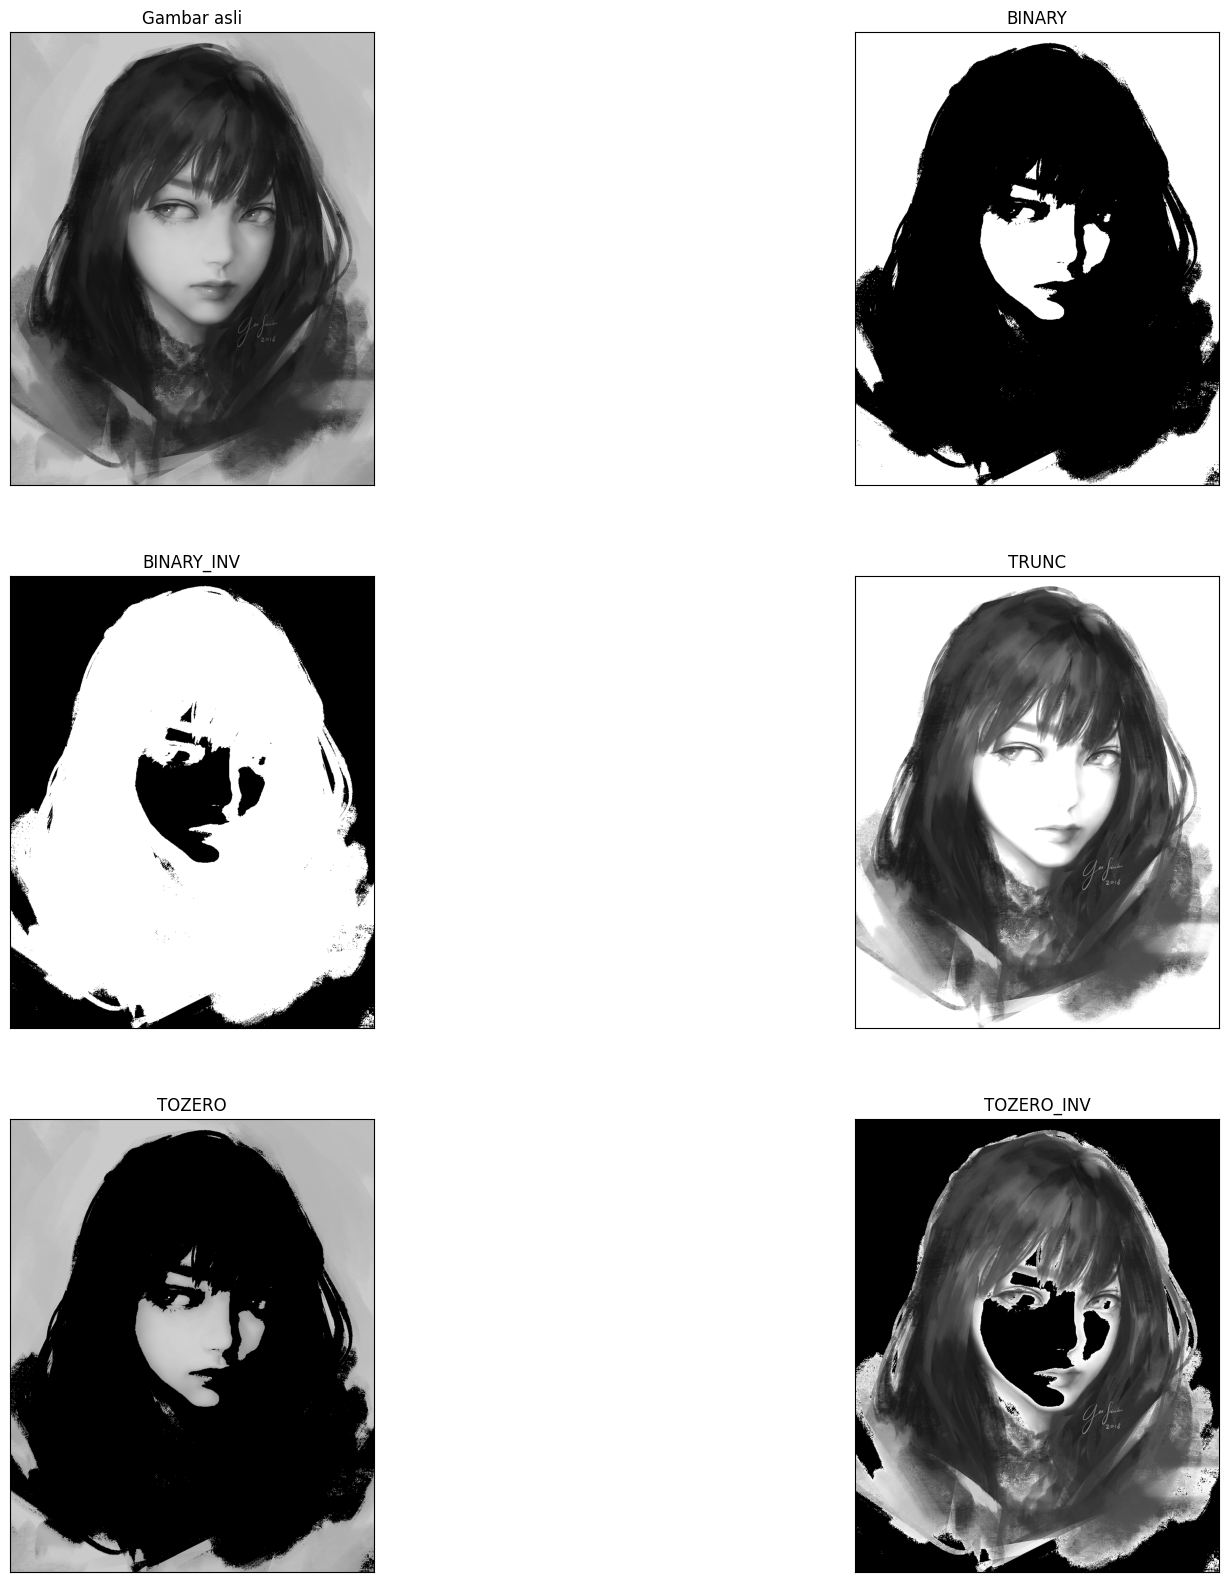

In [88]:
img = cv2.imread('foto/anime.jpg',0) #membaca gambar

#Perhitungan Thresholding
ret,thresh1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,150,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO_INV)

titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV'] #membuat daftar judul untuk setiap gambar
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5] #menampilkan daftar gambar yang akan ditampilkan

for i in range(6): #melakukan loop sebanyak 6 kali
    plt.subplot(3,2,i+1) #untuk mengatur subplot dengan tata letak 3 baris dan 2 kolom
    plt.imshow(images[i],'gray') 
    plt.title(titles[i]) #mengatur judul pada setiap subplot
    plt.xticks([]),plt.yticks([]) #menghilangkan penanda sumbu x dan sumbu y pada setiap subplot 
plt.show() #menampilkan gambar

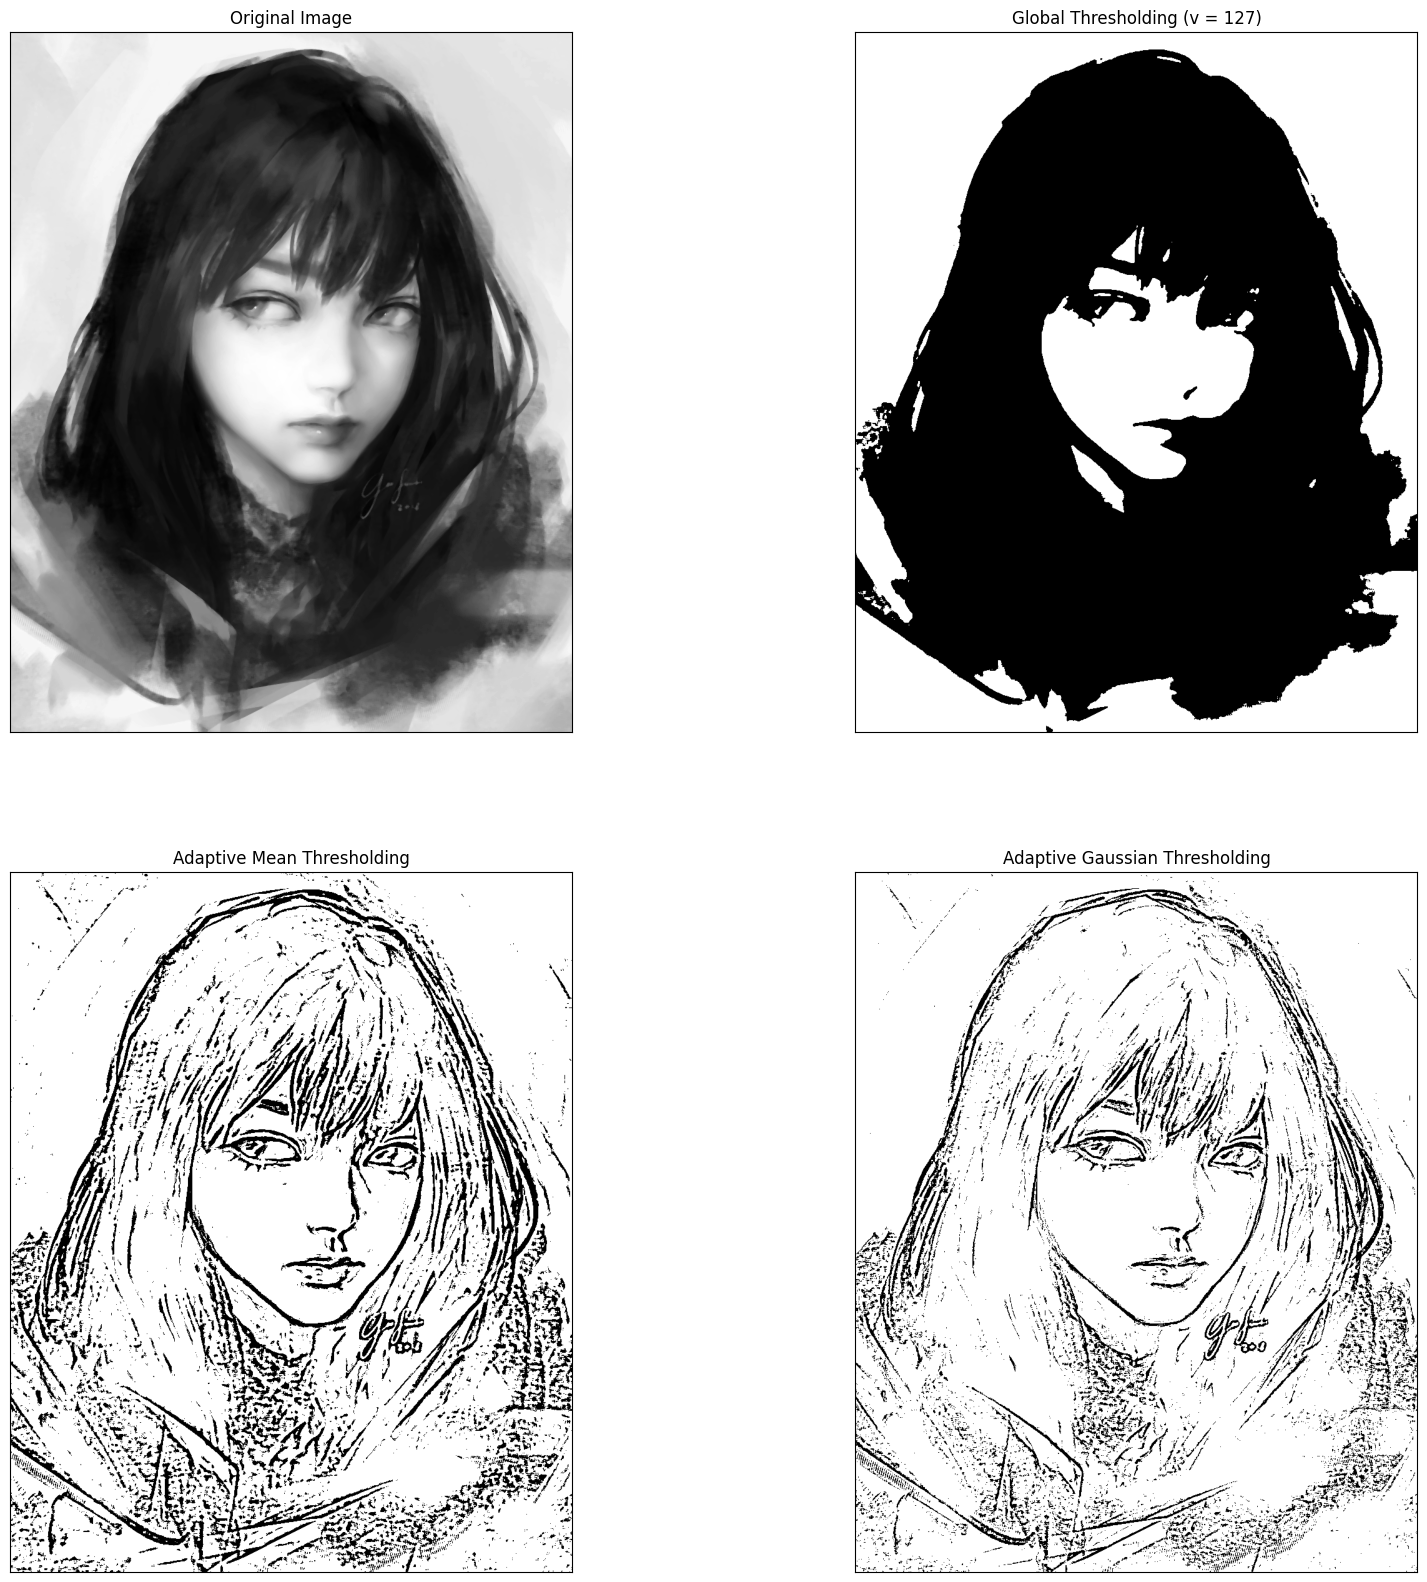

In [87]:
img = cv2.medianBlur(img,5) #untuk menghaluskan tepi ojek pada gambar
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #melakukan thresholding binary global dengan nilai ambang 127 dan disimpan ke variabel th1

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2) #melakukan thresholding adaptif menggunakan metode rata-rata dan disimpan dalam variabel th2

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2) #melakukan thresholding adaptif menggunakan metode Gaussian dan disimpan dalam variabel th3

titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding'] #membuat daftar judul untuk setiap gambar
images = [img, th1, th2, th3] #membuat daftar gambar yang akan ditampilkan pada subplot 

for i in range(4): #melakukan loop sebanyak 4 kali
    plt.subplot(2,2,i+1) #untuk mengatur subplot dengan tata letak 3 baris dan 2 kolom
    plt.imshow(images[i],'gray') 
    plt.title(titles[i]) #mengatur judul pada setiap subplot
    plt.xticks([]),plt.yticks([]) #menghilangkan penanda sumbu x dan sumbu y pada setiap subplot 
plt.show() #menampilkan gambar